In [1051]:
class GraphU():
    global np
    global plt
    import numpy as np
    import matplotlib.pyplot as plt
    '''
    Function for creating undirected self
    '''
    
    def __init__(self):
        self.no_of_nodes=0
        self.char_counter=97
        self.nodes=[]
    def AddNodes(self, number):
        for i in range(number):
            self.nodes.append(Node(chr(self.char_counter)))
            self.char_counter+=1
            
    def Connect(self,mat):
        '''
        Connect function accepts a nested array represenging connections between 
        x and y in the form ['x':'y']. Connections can only be made between nodes
        already placed on self 
        
        example:
        m=[['a','b'],['b','c'],['b','d'],['b','e'],['c','d'],['c','f'],['c','g'],['g','e'],['d','e'],['a','f']]    
        >>> A.Connect(m)
        
        '''
        names=list(map(str,A.nodes))
        node_ords=list(map(ord,names))
        for row in mat:
            con_index1, con_index2 = node_ords.index(ord(row[0])), node_ords.index(ord(row[1]))
            self.nodes[con_index1].connections.append(self.nodes[con_index2])
            self.nodes[con_index2].connections.append(self.nodes[con_index1])
    
    @staticmethod
    def CreateAdjacency(adj_dict):
        '''
        Create Adjacency takes accepts an adjacency list represented in dictionary form as such:
        
        
        example:
        
        a={'a':['b','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m']}        
        A.CreateAdjacency(a)
                
        >>> [['a', 'c'],
        >>> ['a', 'g'],
        >>> ['b', 'd'],
        >>> ['b', 'f'],
        >>> ['b', 'g'],
        >>> ['b', 'h'],
        >>> ['c', 'g'],
        >>> ['c', 'h'],
        >>> ['c', 'k'],
        >>> ['c', 'm']]
        This creates an expanded adjacency list to be used by the Connect Function
        '''
        keys=list(adj_dict.keys())
        values=list(adj_dict.values())
        adj_list=[]
        for i in range(len(keys)):
            for j in range (len(values[i])):
                if ([values[i][j],keys[i]] not in adj_list):
                    adj_list.append([keys[i],values[i][j]])
                else:
                    pass
        return(adj_list)

    def BFSearcher(self, start):
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        k=0
        frontier=[spec]
        visited=[]
        frontier_len=len(frontier)
        while frontier_len!=0:
            spec=frontier[0]
            visited.append(spec)
            conns=spec.connections
            for i in range(len(conns)):
                if ((conns[i] not in visited) and (conns[i] not in frontier)):
                    frontier.append(conns[i])
                    z=len(frontier)
                    frontier[z-1].parent=spec
                else:
                    pass
            frontier.remove(frontier[0])
            frontier_len=len(frontier)
        return(visited)
    
    def Sorter(self,visited):
        for i in range (1,len(visited)):
            path=[[]]*len(visited)
            i=0
            while i<(len(visited)) :
                spec=visited[i]
                path[i]=[spec]
                while (spec.parent!=None) and (spec.parent not in path[i]):
                    path[i].append(spec.parent)
                    spec=spec.parent
                if spec.parent==None:
                    i=i+1
        for i in range(len(path)):
            path[i].reverse()
        return(path)
        
        
    def BFS(self,start):
        '''
        Peforms a Breadth First Search on Undirected Graph
        
        example:
        A.BFS('e')
        
        >>> =[e, z, n, x, o, g, w, c, f, k, u, b, i, p, y, j, v, h, l, r, q, m, t, d, a, s]
        
        example2:
        A.BFS('o')
        
        >>> [o, s, y, p, l, e, u, i, x, c, k, d, z, n, b, r, a, f, m, t, w, g, v, j, h, q]
        
        '''
        a=self.BFSearcher(start)
        b=self.Sorter(a)
        return(b)
         
    def DFSearcher(self,start):
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        visited=[spec]
        f=[spec]
        while len(f)!=0:
            for i in range(len(conns)):
                if all([(conns[i] not in visited),(conns[i] not in f)]):
                    f.append(conns[i])
                    conns[i].parent=spec
                else:
                    pass
            spec=f[-1]
            visited.append(spec)
            f.remove(f[-1])
            conns=spec.connections
        return(visited[0:(len(visited)-1)])
    
    def DFS(self,start):
        a=self.DFSearcher(start)
        b=self.Sorter(a)
        return(b)
           

    def PotentialConnections(self):
        i=len(self.nodes)-1
        d=0
        while i!=0:
            d=d+i
            i=i-1
        return(d)
    
    def Connections(self,connectivity):
        pot_con=self.PotentialConnections()
        return(pot_con,round(pot_con*connectivity))
    
    def RandomConnections(self,connectivity):
        pot_con, desired_connections=self.Connections(connectivity)
        ords=list(map(ord,list(map(str, self.nodes))))
        i=0
        adj_list=[]
        while i<desired_connections:
            Node1=str(np.random.choice(np.array(self.nodes)))
            Node2=str(np.random.choice(np.array(self.nodes)))
            index=list(map(str,self.nodes)).index(Node1)
            if (Node1!=Node2)and(Node2 not in list(map(str, (self.nodes[index].connections)))):
                self.Connect([[Node1,Node2]])
                adj_list.append([Node1,Node2])
                i=i+1
            else:
                pass
        return(r'{} connections made of {}').format(len(adj_list),pot_con)
        del(pot_con)
        
    def DegreeDistribution(self):
        DegreeDist=[len(self.nodes[i].connections) for  i in range(len(self.nodes))]
        counts,bin_edges=np.histogram(DegreeDist)
        plt.figure(figsize=(15,10))
        plt.hist(DegreeDist, range=[min(bin_edges-0.5),max(bin_edges+0.5)], align='mid')
        plt.xlabel('Degree')
        plt.ylabel('Number of Nodes')
        plt.show()

class Node(GraphU):
    def __init__(self,name):
        self.name=name
        self.connections=[]
        self.parent=None
    def __repr__(self):
        return(self.name)

In [1052]:
A=GraphU()

<B><center>Node Addition

In [1053]:
A.AddNodes(20)
A.nodes

[a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t]

<center><B> Random sampling of Connections using Acceptance/Rejection Concept

<I><center>Function is additive (i.e. does not consider previous connections), thus it should only be used once per graph instance


In [1054]:
A.RandomConnections(0.8)

'152 connections made of 190'

<B><center>Degree Distribution Plot

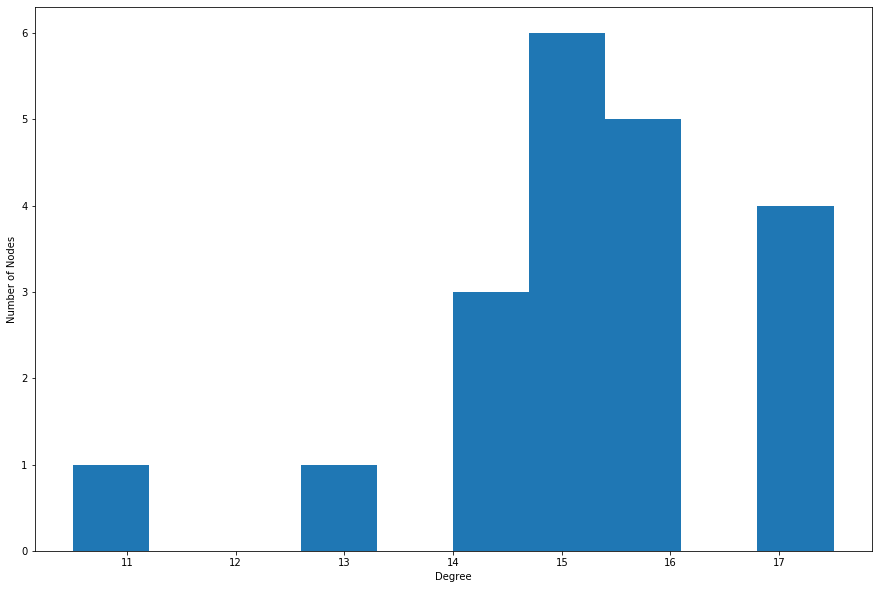

In [1055]:
A.DegreeDistribution()

<B><center> Connections Made Through Expanded Adjacency List

In [1056]:
m=[['a','b'],['b','c'],['b','d'],['b','e'],['c','d'],['c','f'],['c','g'],['g','e'],['d','e'],['a','f']]    
A.Connect(m)

<B><center> BFS

In [1064]:
A.DFS('k')

[[k],
 [k, n],
 [k, n, f],
 [k, n, m],
 [k, b],
 [k, l],
 [k, h],
 [k, o],
 [k, i],
 [k, d],
 [k, a],
 [k, r],
 [k, j],
 [k, q],
 [k, c],
 [k, e],
 [k, s],
 [k, g],
 [k, t],
 [k, p]]

In [1065]:
for i in range(len(A.nodes)):
    A.nodes[i].parent=None

<center><B>DFS

<B><center>Adj List Creation From Dictionary

In [235]:
a={'a':['c','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m']}
A.CreateAdjacency(a)

[['a', 'c'],
 ['a', 'g'],
 ['b', 'd'],
 ['b', 'f'],
 ['b', 'g'],
 ['b', 'h'],
 ['c', 'g'],
 ['c', 'h'],
 ['c', 'k'],
 ['c', 'm']]

In [926]:
class GraphD():
    global np
    global plt
    import numpy as np
    import matplotlib.pyplot as plt
    '''
    Function for creating undirected self
    '''
    
    def __init__(self):
        self.no_of_nodes=0
        self.char_counter=97
        self.nodes=[]
    def AddNodes(self, number):
        for i in range(number):
            self.nodes.append(Node(chr(self.char_counter)))
            self.char_counter+=1
            
    def Connect(self,mat):
        '''
        Connect function accepts a nested array represenging connections between 
        x and y in the form ['x':'y']. Connections can only be made between nodes
        already placed on self 
        
        example:
        m=[['a','b'],['b','c'],['b','d'],['b','e'],['c','d'],['c','f'],['c','g'],['g','e'],['d','e'],['a','f']]    
        >>> A.Connect(m)
        
        '''
        names=list(map(str,A.nodes))
        node_ords=list(map(ord,names))
        for row in mat:
            con_index1, con_index2 = node_ords.index(ord(row[0])), node_ords.index(ord(row[1]))
            self.nodes[con_index1].connections.append(self.nodes[con_index2])
    
    @staticmethod
    def CreateAdjacency(adj_dict):
        '''
        Create Adjacency takes accepts an adjacency list represented in dictionary form as such:
        
        
        example:
        
        a={'a':['b','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m']}        
        A.CreateAdjacency(a)
                
        >>> [['a', 'c'],
        >>> ['a', 'g'],
        >>> ['b', 'd'],
        >>> ['b', 'f'],
        >>> ['b', 'g'],
        >>> ['b', 'h'],
        >>> ['c', 'g'],
        >>> ['c', 'h'],
        >>> ['c', 'k'],
        >>> ['c', 'm']]
        This creates an expanded adjacency list to be used by the Connect Function
        '''
        keys=list(adj_dict.keys())
        values=list(adj_dict.values())
        adj_list=[]
        for i in range(len(keys)):
            for j in range (len(values[i])):
                if ([keys[i],values[i][j]] not in adj_list):
                    adj_list.append([keys[i],values[i][j]])
                else:
                    pass
        return(adj_list)

    def BFSearcher(self, start):
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        k=0
        frontier=[spec]
        visited=[]
        frontier_len=len(frontier)
        while frontier_len!=0:
            spec=frontier[0]
            visited.append(spec)
            conns=spec.connections
            for i in range(len(conns)):
                if ((conns[i] not in visited) and (conns[i] not in frontier)):
                    frontier.append(conns[i])
                    z=len(frontier)
                    frontier[z-1].parent=spec
                else:
                    pass
            frontier.remove(frontier[0])
            frontier_len=len(frontier)
        return(visited)
    
    def Sorter(self,visited):
        for i in range (1,len(visited)):
            path=[[]]*len(visited)
            i=0
            while i<(len(visited)):
                spec=visited[i]
                path[i]=[spec]
                while spec.parent!=None:
                    path[i].append(spec.parent)
                    spec=spec.parent
                if spec.parent==None:
                    i=i+1
        for i in range(len(path)):
            path[i].reverse()
        return(path)
        
        
    def BFS(self,start):
        '''
        Peforms a Breadth First Search on Undirected Graph
        
        example:
        A.BFS('e')
        
        >>> =[e, z, n, x, o, g, w, c, f, k, u, b, i, p, y, j, v, h, l, r, q, m, t, d, a, s]
        
        example2:
        A.BFS('o')
        
        >>> [o, s, y, p, l, e, u, i, x, c, k, d, z, n, b, r, a, f, m, t, w, g, v, j, h, q]
        
        '''
        a=self.BFSearcher(start)
        b=self.Sorter(a)
        return(b)
         
    def DFSearcher(self,start):
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        visited=[spec]
        f=[spec]
        while len(f)!=0:
            for i in range(len(conns)):
                if all([(conns[i] not in visited),(conns[i] not in f)]):
                    f.append(conns[i])
                    conns[i].parent=spec
                else:
                    pass
            spec=f[-1]
            visited.append(spec)
            f.remove(f[-1])
            conns=spec.connections
        return(visited)
    
    def DFS(self,start):
        a=self.DFSearcher(start)
        b=self.Sorter(a)
        return(b)
           

    def PotentialConnections(self):
        i=len(self.nodes)-1
        d=0
        while i!=0:
            d=d+i
            i=i-1
        return(d)
    
    def Connections(self,connectivity):
        pot_con=self.PotentialConnections()
        return(pot_con,round(pot_con*connectivity))
    
    def RandomConnections(self,connectivity):
        pot_con, desired_connections=self.Connections(connectivity)
        ords=list(map(ord,list(map(str, self.nodes))))
        i=0
        adj_list=[]
        while i<desired_connections:
            Node1=str(np.random.choice(np.array(self.nodes)))
            Node2=str(np.random.choice(np.array(self.nodes)))
            index=list(map(str,self.nodes)).index(Node1)
            if (Node1!=Node2)and(Node2 not in list(map(str, (self.nodes[index].connections)))):
                self.Connect([[Node1,Node2]])
                adj_list.append([Node1,Node2])
                i=i+1
            else:
                pass
        return(r'{} connections made of {}').format(len(adj_list),pot_con)
        del(pot_con)
        
    def DegreeDistribution(self):
        DegreeDist=[len(self.nodes[i].connections) for  i in range(len(self.nodes))]
        counts,bin_edges=np.histogram(DegreeDist)
        plt.figure(figsize=(15,10))
        plt.hist(DegreeDist, range=[min(bin_edges-0.5),max(bin_edges+0.5)], align='mid')
        plt.xlabel('Degree')
        plt.ylabel('Number of Nodes')
        plt.show()

class Node(GraphD):
    def __init__(self,name):
        self.name=name
        self.connections=[]
        self.parent=None
    def __repr__(self):
        return(self.name)

In [927]:
a={'a':['c','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m','p'],'g':['b'],'p':['c'],'p':['c']}

A=GraphD()

A.AddNodes(20)

A.RandomConnections(0.3)

'57 connections made of 190'

In [929]:
sys.getsizeof(A.BFS('a'))

208

In [930]:
sys.getsizeof(A.DFS('a'))

216